## 1. A review of statistical terms

### 1.1 Variance & Standard Deviation
Suppose we have a list of widgets. What is the mean, variance, and standard deviation of this list?

In [1]:
# here's the list.
widgets=[451, 330, 570, 390, 410]

In [2]:
# which libraries should we import here?
import math
import numpy as np
import pandas as pd

In [3]:
# find the mean
total = sum(widgets)
mean_widgets = total/len(widgets)
print("mean widgets: ", mean_widgets)

mean widgets:  430.2


#### Variance

In [4]:
# first write a little function 
def subtract_mean(number):
    return number-mean_widgets

# Note: this can be converted to lambda for efficiency:
lambda x: x-mean_widgets

<function __main__.<lambda>(x)>

In [5]:
# use `map` to apply that function to our list 
distances = list(map(subtract_mean, widgets))

In [6]:
# square and sum all of those distances
squared_distances = list(map(lambda x: x**2, distances))

In [7]:
# how long is our list?
list_length=len(squared_distances)-1 # for a sample taken from a population
list_length=len(squared_distances) # for a whole population (no sample)

In [8]:
# calculate variance
variance_widgets = sum(squared_distances)/list_length
print('{:.2f}'.format(variance_widgets,3))

6408.16


#### standard dev

In [9]:
# calculate the standard deviation
print('{:.2f}'.format(math.sqrt(variance_widgets)))
print('{:.2f}'.format(np.sqrt(variance_widgets)))

80.05
80.05


In [10]:
# check our work using numpy
print(np.mean(widgets))
print('{:.2f}'.format(np.var(widgets)))
print('{:.2f}'.format(np.std(widgets)))

430.2
6408.16
80.05


In [11]:
# check our work using pandas
df = pd.DataFrame({"widgets": widgets})
print('mean:', df['widgets'].mean())

mean: 430.2


In [12]:
# for a population
print('var:', '{:.2f}'.format(df['widgets'].var(ddof=0)))
print('std:', '{:.2f}'.format(df['widgets'].std(ddof=0)))

var: 6408.16
std: 80.05


In [13]:
# for a sample
print('var:', '{:.2f}'.format(df['widgets'].var(ddof=1)))
print('std:', '{:.2f}'.format(df['widgets'].std(ddof=1)))

var: 8010.20
std: 89.50


### 1.2 Covariance
Find the covariance between widgets and gadgets.

In [14]:
# make a new list
gadgets = [410, 505, 371, 220, 625]

In [15]:
# using numpy
print('{:.2f}'.format(np.cov(widgets, gadgets)[0][1]))

-2919.05


In [16]:
# using pandas
df['gadgets'] = pd.Series(gadgets)
print('{:.2f}'.format(df.cov().values[0][1]))

-2919.05


### 1.3 Correlation Coefficient 
Find the correlation coefficient that summarizes the relationship between widgets and gadgets. 

In [17]:
# Calculate the standard dev of both lists using pandas.
std_w = df['widgets'].std(ddof=1)
std_g = df['gadgets'].std(ddof=1)
print('{:.4f}'.format(std_w))
print('{:.4f}'.format(std_g))

89.4997
151.2934


In [18]:
# Calculate covariance using pandas
cov_wg = df['widgets'].cov(df['gadgets'])
print('{:.4f}'.format(cov_wg))

-2919.0500


In [19]:
# Calculate the denominator
denom = std_w*std_g

In [20]:
# Calculate correlation
corr_wg = cov_wg/denom
print('{:.6f}'.format(corr_wg))

-0.215576


In [21]:
## Check work using pandas
print('{:.6f}'.format(df['widgets'].corr(df['gadgets'])))

-0.215576


In [22]:
# A shorter way to do this
df.corr()

,widgets,gadgets
widgets,1.000000,-0.215576
gadgets,-0.215576,1.000000


### 1.4 The Variance-Covariance Matrix
Import a dataset of residential properties in Washington DC. Calculate the variance-covariance matrix and correlation matrix for the dataset's numeric columns.

In [23]:
# source: https://www.kaggle.com/christophercorrea/dc-residential-properties/
houses = pd.read_csv('https://raw.githubusercontent.com/austinlasseter/dash-scatterplot-housing/master/dchouses.csv')
houses.head(2)

,BATHRM,HF_BATHRM,KITCHENS,HEAT,AC,ROOMS,PRICE
0,1,1,1.0,Forced Air,Y,6,NaN
1,2,1,1.0,Hot Water Rad,Y,8,460000.0


In [24]:
# calculate the covariance for the entire dataset
houses.cov()

,BATHRM,HF_BATHRM,KITCHENS,ROOMS,PRICE
BATHRM,1.007166,0.125448,0.329582,1.866127e+00,-5.164766e+05
HF_BATHRM,0.125448,0.340972,-0.067744,4.989159e-01,4.109166e+05
KITCHENS,0.329582,-0.067744,0.420696,9.291807e-01,-6.497264e+03
ROOMS,1.866127,0.498916,0.929181,7.218137e+00,-3.030853e+06
PRICE,-516476.554036,410916.625989,-6497.264022,-3.030853e+06,1.551202e+14


In [25]:
# calculate the correlation for the entire dataset
houses.corr()

,BATHRM,HF_BATHRM,KITCHENS,ROOMS,PRICE
BATHRM,1.000000,0.214070,0.461896,0.692115,-0.042109
HF_BATHRM,0.214070,1.000000,-0.173102,0.318021,0.058728
KITCHENS,0.461896,-0.173102,1.000000,0.592760,-0.021364
ROOMS,0.692115,0.318021,0.592760,1.000000,-0.088273
PRICE,-0.042109,0.058728,-0.021364,-0.088273,1.000000


## 2. Orthogonality

### 2.1 Quick review of norm and dot product.

In [26]:
# let's make a couple of vectors.
v = np.random.randint(low=1, high=100, size=3)
x = np.random.randint(low=1, high=100, size=3)
print(v, '\n', x)

[42 73  6] 
 [97 69 69]


In [27]:
# quick: which one is longer? 
for vect in [v,x]:
    norm=np.linalg.norm(vect)**2
    print('{:.2f}'.format(norm))

7129.00
18931.00


In [28]:
# what's the dot product of x and v? using array broadcasting
(v[0]*x[0]) + (v[1]*x[1]) + (v[2]*x[2])

9525

In [29]:
# what's the dot product of x and v? using numpy
np.dot(x,v)

9525

In [30]:
# there's another way to write this.
x.dot(v) 

9525

### 2.2 Orthogonality

In [31]:
# import
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# choose some vectors
vector_1 = [2, 2]
vector_2 = [1, -1]

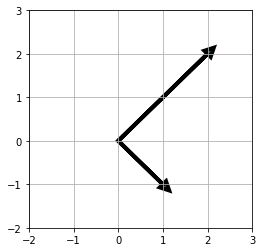

In [33]:
# Set up the figure so that x and y axes are symmetrical.

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,3)          
plt.ylim(-2,3)

# Plot the vectors
for vect in [vector_1, vector_2]:
    plt.arrow(0,0, vect[0], vect[1], head_width=.2, head_length=0.2, linewidth=4)
plt.show()

Are the following vectors orthogonal?

In [34]:
# If dot product != 0, then vectors are not orthogonal.
a = np.array([-7,4])
b = np.array([-5,3])
np.dot(a,b)

47

In [35]:
# If dot product = 0, then vectors are orthogonal.
a = np.array([0,4])
b = np.array([-5,0])
np.dot(a,b)

0

In [36]:
# If dot product = 0, then vectors are orthogonal.
np.dot(vector_1,vector_2)

0

In [37]:
# For any vector, generate another vector that is orthogonal to it.
k = np.random.randn(3) # take any random vector.
print(k)
x = np.random.randn(3) # take any random vector of the same length.
x -= x.dot(k) * k / np.linalg.norm(k)**2      # make it orthogonal to k
print(x)
xk=np.dot(x, k) # generate the dot product, to confirm that it's zero.
print('{:.8f}'.format(xk))

[ 0.56556392 -2.61265358  2.1670803 ]
[-0.25976011  0.77702865  1.00458559]
0.00000000


## 3. Unit Vectors

In [38]:
# Suppose we have a vector f.
f = np.random.randint(low=1, high=100, size=5)
f

array([17, 78, 35, 73, 30])

In [39]:
# how long is it?
norm_f = np.linalg.norm(f)
print('{:.4f}'.format(norm_f))

117.5883


In [40]:
# find its unit vector. the hat symbol (f^) indicates it's a unit vector.
f_hat = f/np.linalg.norm(f)
print(f_hat)

[0.14457225 0.6633315  0.29764875 0.62081025 0.2551275 ]


In [41]:
# how long is this?
f_hat_norm = np.linalg.norm(f_hat)
print('{:.4f}'.format(f_hat_norm))

1.0000


## 4. Linear Independence / Dependence 

Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [42]:
# Linearly dependent vectors
vector_1 = [-.8, 1.3]
vector_2 = np.multiply(vector_1, 2)
print(vector_1, '\n', vector_2)

[-0.8, 1.3] 
 [-1.6  2.6]


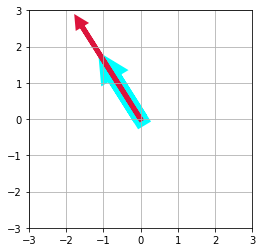

In [43]:
# Plot the vectors

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)

for myvect, mycolor, width in [(vector_1, 'cyan', 15), (vector_2, 'crimson', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

In [44]:
# Linearly independent vectors, not orthogonal
vector_1 = np.random.randint(low=-3, high=3, size=2)
vector_2 = np.random.randint(low=-3, high=3, size=2)
print(vector_1, '\n', vector_2)

[0 2] 
 [-1 -2]


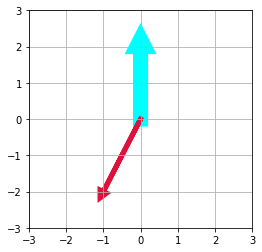

In [45]:
# Set up the grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)

# Plot the vectors
for myvect, mycolor, width in [(vector_1, 'cyan', 15), (vector_2, 'crimson', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

## 5. Span

Suppose we have two vectors. The linear combination is as follows, where a and b are any scalars.

\begin{align}
a\begin{bmatrix} 1 & 3 \end{bmatrix} +
b\begin{bmatrix} 2 & 1 \end{bmatrix}
\end{align}

Note that:
* The set of all possible linear combinations (i.e., all possible values of a and b) is the span of these vectors. 
* A set of vectors _spans_ a space if their linear combinations fill the space.
* The span of most pairs of 2D vectors is the entire infinite sheet of infinite space (unless they are colinear). 

In [46]:
# Let's take two vectors.
vector_1 = np.array([1,3])
vector_2 = np.array([2,1])

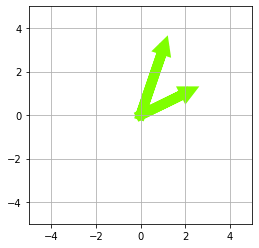

In [47]:
# Plot them on a grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,5)          
plt.ylim(-5,5)

# Display
for myvect in [vector_1, vector_2]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=10, 
              color='chartreuse')

In [48]:
# This is one possible linear combination:
a,b=(2,3)
linear_combo= np.multiply(vector_1, a) + np.multiply(vector_2, b) 
print(linear_combo)

[8 9]


In [49]:
# This is a set of several linear combinations:
muchos_combos=[]
for (a,b) in [(2,3), (4,5), (6,7), (8,9)]:
    linear_combo = np.multiply(vector_1, a) + np.multiply(vector_2, b) 
    muchos_combos.append(linear_combo)
print(muchos_combos)

[array([8, 9]), array([14, 17]), array([20, 25]), array([26, 33])]


## 6. Basis

In 2-dimensional space $\mathbb{R}^2$, ANY vector (a,b) can be decomposed as the linear combination of the basis vectors (1,0) and (0,1). Since these are unit vectors, they are called "orthonormal basis".

(a,b) = a(1,0) + b(0,1)

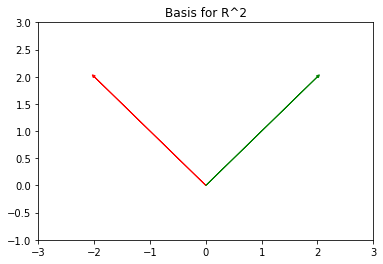

In [50]:
# find basis vectors in 2-d
vector_1 = [-2, 2]
vector_2 = [2, 2]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Basis for R^2")
plt.show()

## 7. Rank

Rank means the number of dimensions in the output of a matrix that's used for linear transformation. For example, when the output of a transformation is a line, we say the matrix has a rank of 1. If it's a plane, then it's rank 2. Put another way, Rank tells us the number of linearly independent vectors in the row space of a matrix and by extension the space of R^n that is spanned by the vectors of the matrix.

In [53]:
# Rank two
P = np.array([[1,2,3],[4,5,6]])
np.linalg.matrix_rank(P)

2

To find the span of multiple vectors you first have to find their rank. Because their matrix is rank 3, we know that these vectors span R^3.

In [4]:
# example
import numpy as np
v1 = np.array([[2,4,6],[-2,0,3],[2,8,12]])
np.linalg.matrix_rank(v1)

3

In [15]:
matrix = pd.DataFrame({'a':[1,2,3],'b':[-1,0,7],'c':[4,8,2]})
np.linalg.matrix_rank(matrix)

3

In [10]:
# this also works if the vectors are introduced as columns
import pandas as pd
v2 = np.array([[1],[-2],[2]])
v2=pd.DataFrame(v2)
np.linalg.matrix_rank(v2)

1

In [54]:
# Return a 2-D array with ones on the diagonal and zeros elsewhere.
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [55]:
# rank three
P = np.array([[1,2,3],[-1,0,7],[4,8,2]])
np.linalg.matrix_rank(P)

3

In [56]:
# rank four
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [57]:
# rank four
np.linalg.matrix_rank(np.eye(4))

4

In [58]:
# Rank zero
P = np.array([0])
print(np.linalg.matrix_rank(P))
np.eye(0)

0


array([], shape=(0, 0), dtype=float64)

In [59]:
# Rank one
P = np.array([[1,2,3]])
np.linalg.matrix_rank(P)

1

In [60]:
# Rank one
np.eye(1)

array([[1.]])

In [73]:
# try this one.
P = np.array([[11,12,31],
              [-12,20,17],
              [41,18,22]])
rank = np.linalg.matrix_rank(P)
print(rank)

3


## 8. Linear Projections

Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 

In [0]:
# Original Vector
v = np.array([2,1])
w = np.array([-3,3])

In [0]:
# dot product
w_dot_v = np.dot(v, w)
v_dot_v = np.dot(v, v)

In [66]:
# projection
fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction,v)
print(projection)

[-1.2 -0.6]


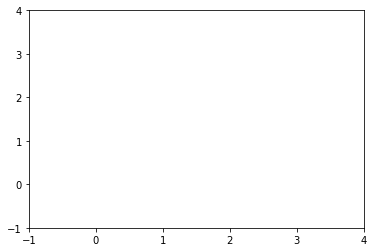

In [68]:
# Plot a line
plt.xlim(-1,4)          
plt.ylim(-1,4)
axes = plt.gca()

In [0]:
# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


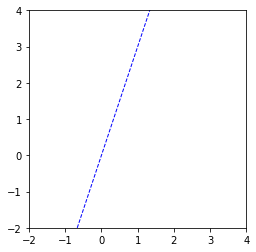

In [71]:
# Axis Bounds
plt.xlim(-2,4)          
plt.ylim(-2,4)

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)